In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


## 標準ブラウン運動

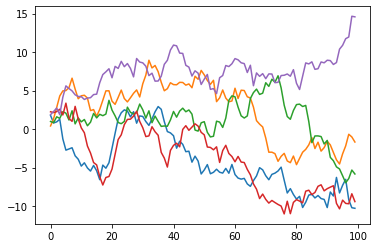

In [3]:
np.random.seed(0)

x = np.arange(0,100,1)
y = np.zeros([x.shape[0], 5])

y[0,:] = stats.norm.rvs(size=5)
for i in range(x.shape[0]-1):
    y[i+1,:] = y[i,:] + stats.norm.rvs(size=5) #1つ前の状態＋正規分布に従うノイズ

for i in range(y.shape[1]):
    plt.plot(x,y[:,i])

plt.show()

## ブラウン運動

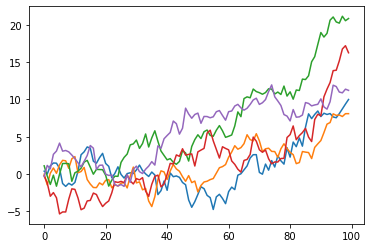

In [4]:
mu, sigma = 0.2, 1
x = np.arange(0,100,1)
y = np.zeros([x.shape[0],5])

y[0,:] = stats.norm.rvs(size=5)
for i in range(x.shape[0]-1):
    y[i+1,:] = y[i,:] + stats.norm.rvs(mu,sigma,size=5)

for i in range(y.shape[1]):
    plt.plot(x,y[:,i])

plt.show()

## ポワソン過程

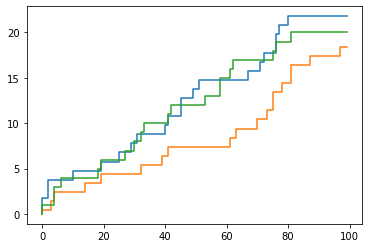

In [8]:
np.random.seed(0)
lamb = 0.2
x = np.arange(0,100,1)
y = np.zeros([x.shape[0],3])

y[0,:] = stats.norm.rvs(size=3) #初期値は正規分布に従う
for i in range(x.shape[0]-1):
    y[i+1,:] = y[i,:] + stats.poisson.rvs(lamb, size=3) #一つ前の値＋ポワソン分布に従うノイズ

x_ = np.repeat(x,2)
y_ = np.zeros([200,3])
for i in range(1,200):
    y_[i,:] = y[(i-1)//2,:]

for i in range(y.shape[1]):
    plt.plot(x_, y_[:,i])

plt.show()

In [10]:
#パラメータ推定
lamb = 0.2
x = np.arange(0,10000,1)
y = np.zeros([x.shape[0],3])

y[0,:] = stats.norm.rvs(size=3)
for i in range(x.shape[0]-1):
    y[i+1,:] = y[i,:] + stats.poisson.rvs(lamb,size=3)

diff = y
diff[1:diff.shape[0],:] = diff[1:diff.shape[0],:] - diff[0:(diff.shape[0]-1),:]

lambda_estimate = np.mean(diff, axis=0)
#n個に刻んだ時刻で何回＋１されたかを、0と1の数の平均を取ることによって割合で算出、つまりそれがラムダ。

print('Estimated lambda: {}'.format(lambda_estimate))

Estimated lambda: [0.20057666 0.19828597 0.20413663]
